# Análisis de datos
## Aquí se presenta el segundo análisis de datos del proyecto de tesis RMN-EF de Randhal Smith Ramirez Orozco, estudiante de ingeniería química en la UNPHU con matrícula 16-1702.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.fft import fft, dct, dst

In [2]:
#1 Se obtienen los datos de la base de datos importada con arduino y se fijan los primeros parámetros 

df=pd.read_csv('alldata.csv')
xt=np.linspace(0,1.2,20000)
def tick(f):
    return '[DATA'+str(f)+']'

def typ(f):
    if f%2==1:
        return 'ESPECTRO #'+str(f)+': FONDO VACÍO'
    if f%2==0:
        return 'ESPECTRO #'+str(f)+': AGUA PURA'     

ynums=np.arange(-3000,3500,500)
xnums=np.arange(0,1.25,0.05)

In [3]:
#2 Se hace estadística con las 3 primeras mediciones del fondo y de la muestra del agua
mst_fondo=np.mean([df['[DATA1]'].values,df['[DATA3]'].values,df['[DATA5]'].values],axis=0)
mst_agua=np.mean([df['[DATA2]'].values,df['[DATA4]'].values,df['[DATA6]'].values],axis=0)

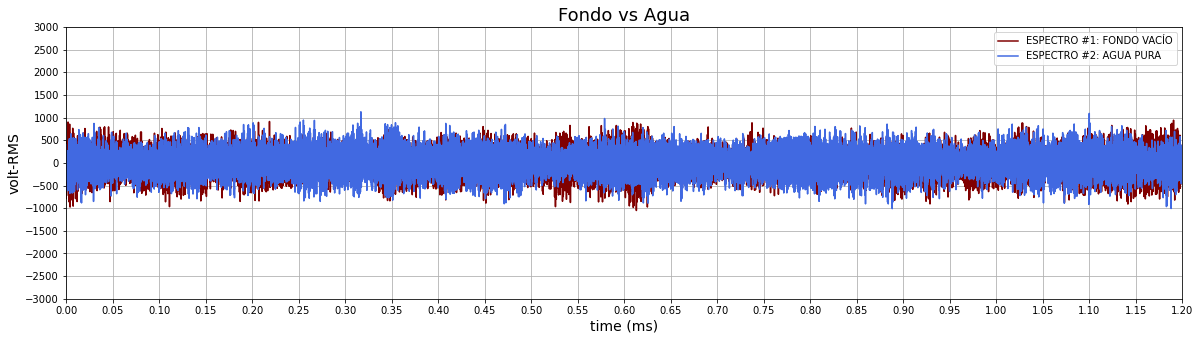

In [4]:
#3 generar imágenes
plt.figure(figsize=[20,5])
plt.plot(xt,mst_fondo,'maroon',label=typ(1))
plt.plot(xt,mst_agua,'royalblue',label=typ(2))
plt.xlim(0,1.2)
plt.ylim(-3000,3000)
plt.xlabel('time (ms)',size=14)
plt.ylabel('volt-RMS',size=14)
plt.title('Fondo vs Agua',size=18)
plt.yticks(ynums)
plt.xticks(xnums)
plt.grid()
plt.legend()
plt.savefig('fondo_vs_agua.png')

### Interpretación: 
#### Como el agua absorbe las radiofrecuencias emitidas por el disposotivo se espera que según la teoría expuesta esta tenga un espectro de menor RMS que el propio fondo, sin embargo no se aprecia con la diferencia deseada en el espectro generado como una función de tiempo, esto debido a que el dispositivo aún no está aislado con una jaula de Faraday adecuada, por lo que el espectro del agua se ve opacada por la radiofrecuencia de fondo (onda wi-fi, señal telefónica, microondas, etc). Para la tercera medición se pretende construir un aislamiento de radiofrecuencias más efectivo.

#### Se evalúa mediante transformada de Fourier para notar las frecuencias más sensibles al agua.

In [5]:
#4 Análisis por transformada de fourier 
mst_fondofft=fft(mst_fondo)
mst_aguafft=fft(mst_agua)
mst_fondodct=dct(mst_fondo)
mst_aguadct=dct(mst_agua)
mst_fondodst=dst(mst_fondo)
mst_aguadst=dst(mst_agua)
xft=np.linspace(0,4250,20000)
xnums=np.arange(0,4100,100)

C:\Users\randh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\randh\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


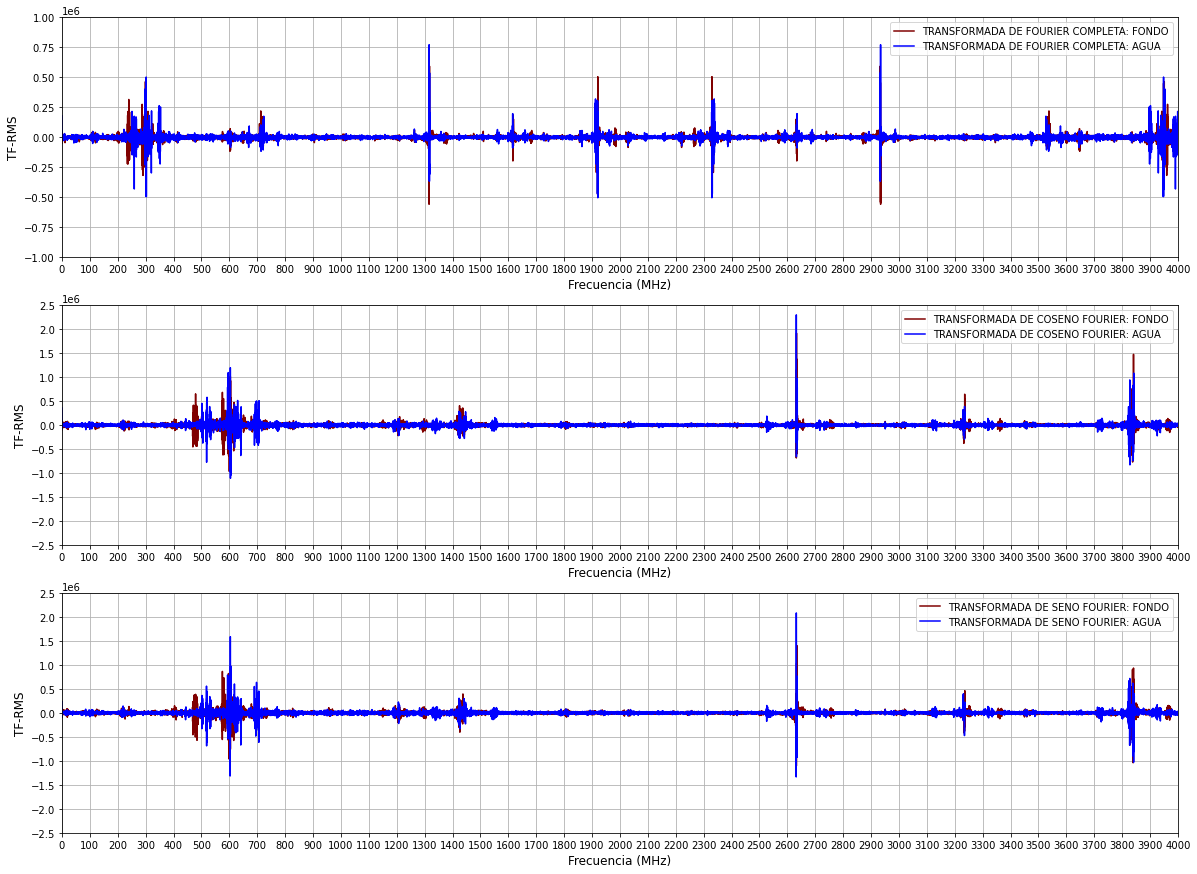

In [6]:
plt.figure(figsize=[20,15])
plt.subplot(311)
plt.plot(xft,mst_fondofft,'maroon',label='TRANSFORMADA DE FOURIER COMPLETA: FONDO')
plt.plot(xft,mst_aguafft,'blue',label='TRANSFORMADA DE FOURIER COMPLETA: AGUA')
plt.xlim(0,4000)
plt.ylim(-1000000,1000000)
plt.ylabel('TF-RMS',size=12)
plt.xlabel('Frecuencia (MHz)',size=12)
plt.xticks(xnums)
plt.grid()
plt.legend()
plt.subplot(312)
plt.plot(xft,mst_fondodct,'maroon',label='TRANSFORMADA DE COSENO FOURIER: FONDO')
plt.plot(xft,mst_aguadct,'blue',label='TRANSFORMADA DE COSENO FOURIER: AGUA')
plt.xlim(0,4000)
plt.ylim(-2500000,2500000)
plt.ylabel('TF-RMS',size=12)
plt.xticks(xnums)
plt.xlabel('Frecuencia (MHz)',size=12)
plt.yticks(np.arange(-2500000,3000000,500000))
plt.grid()
plt.legend()
plt.subplot(313)
plt.plot(xft,mst_fondodst,'maroon',label='TRANSFORMADA DE SENO FOURIER: FONDO')
plt.plot(xft,mst_aguadst,'blue',label='TRANSFORMADA DE SENO FOURIER: AGUA')
plt.xlim(0,4000)
plt.ylim(-2500000,2500000)
plt.xlabel('Frecuencia (MHz)',size=12)
plt.ylabel('TF-RMS',size=12)
plt.xticks(xnums)
plt.yticks(np.arange(-2500000,3000000,500000))
plt.grid()
plt.legend()
plt.savefig('transformadas.png')

### Interpretación: 

#### En base al análisis realizado, se observa que las frecuencias más sensibles están entre los 400 a 800 MHz, los 2500 a 3000 MHz y los 3800 a 4000 MHz, por lo cual se concluye que al centrarse en estas partes el análisis es más significativo, dado que se pueden observar mejor las respuestas del dispositivo.